In [3]:
#!/usr/bin/env python3

from __future__ import annotations
import os, requests, logging
from pathlib import Path
from typing import List
from datetime import datetime

# import bs4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_percentage_error
# from keras import Model
# from keras.layers import Input, Dense, Dropout
# from keras.layers import LSTM

import folium
from geopy import geocoders
from geopy.geocoders import Nominatim

_DATASET_ENDPOINT = Path(os.getcwd()).resolve().parent.parent

In [41]:
def req():
   dates: List = []
   prices: List = []
   url = requests.get('https://fsapi.gold.org/api/goldprice/v11/chart/price/usd/grams/,1713462541683?cache')

   msg = "Last request time: {time}".format(time = url.json()['system']['request_time'])
   print(msg)
   for date, price in url.json()['chartData']['USD']:
      tr_date = datetime.fromtimestamp(date / 1000).date()
      dates.append(tr_date)
      prices.append(price)
      
   df = pd.DataFrame({'Date': dates, 'Price': prices})
   print(df)

req()

Last request time: 2024-04-20 05:01:15
           Date     Price
0    1970-01-01   1.13074
1    1970-02-11   1.12335
2    1970-03-24   1.12495
3    1970-05-04   1.14521
4    1970-06-12   1.15582
..          ...       ...
483  2023-12-06  65.15030
484  2024-01-23  65.03940
485  2024-03-04  67.45390
486  2024-04-16  76.16990
487  2024-04-18  76.60560

[488 rows x 2 columns]


In [49]:
dt = pd.DataFrame(pd.read_excel(_DATASET_ENDPOINT / 'datasets/Prices.xlsx', sheet_name=["Daily"])["Daily"])
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11816 entries, 0 to 11815
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    11816 non-null  datetime64[ns]
 1   USD     11816 non-null  float64       
 2   EUR     11816 non-null  float64       
 3   JPY     11814 non-null  float64       
 4   GBP     11816 non-null  float64       
 5   CAD     11814 non-null  float64       
 6   CHF     11814 non-null  float64       
 7   INR     11814 non-null  float64       
 8   CNY     10245 non-null  float64       
 9   TRY     10771 non-null  float64       
 10  SAR     11814 non-null  float64       
 11  IDR     11814 non-null  float64       
 12  AED     11814 non-null  float64       
 13  THB     11814 non-null  float64       
 14  VND     8965 non-null   float64       
 15  EGP     9225 non-null   float64       
 16  KRW     11814 non-null  float64       
 17  RUB     8155 non-null   float64       
 18  ZAR   

In [50]:
dt.describe()

,Date,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,TRY,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
count,11816,11816.000000,11816.000000,11814.000000,11816.000000,11814.000000,11814.000000,11814.000000,10245.000000,10771.000000,11814.000000,1.181400e+04,11814.000000,11814.000000,8.965000e+03,9225.000000,1.181400e+04,8155.000000,11814.000000,11814.000000
mean,2001-08-21 07:11:54.150304768,763.939196,642.355448,93023.610964,512.601651,940.252613,880.600900,40069.377720,5432.063958,4096.462891,2845.516132,7.508153e+06,2807.687085,24243.033531,1.739656e+07,9860.002438,8.187223e+05,44756.296991,7525.661017,981.202620
min,1978-12-29 00:00:00,216.850000,133.830000,26851.600000,107.980000,256.830000,359.620000,1782.010000,809.630000,0.080000,718.140000,1.351224e+05,825.530000,4374.720000,1.536705e+06,863.360000,1.068198e+05,132.710000,187.080000,189.800000
25%,1990-04-25 18:00:00,356.637500,308.890000,43300.367500,219.927500,461.567500,503.182500,6711.102500,2234.570000,3.400000,1322.145000,7.099604e+05,1311.065000,9665.635000,4.146624e+06,1195.910000,3.034688e+05,7798.240000,989.067500,477.775000
50%,2001-08-21 12:00:00,429.400000,381.375000,77331.935000,262.495000,541.000000,758.660000,13716.620000,3432.520000,544.760000,1578.855000,2.872207e+06,1576.395000,12960.330000,1.047323e+07,3566.360000,3.941664e+05,22008.230000,2289.735000,564.245000
75%,2012-12-17 06:00:00,1236.500000,1018.982500,133017.600000,826.917500,1441.867500,1197.697500,76084.397500,8395.090000,2960.950000,4637.715000,1.485680e+07,4541.660000,40810.017500,2.913070e+07,10429.830000,1.385435e+06,74445.015000,13322.592500,1461.530000
max,2024-04-12 00:00:00,2401.500000,2256.620000,367693.670000,1929.070000,3307.590000,2191.370000,200645.330000,17380.620000,77707.500000,9008.750000,3.870017e+07,8819.270000,88026.980000,6.002309e+07,114280.180000,3.327446e+06,285610.400000,45396.270000,3715.770000
std,NaN,539.734054,462.964182,59557.099188,418.913165,659.114273,415.691621,44816.200608,3793.761873,10161.706486,2037.208674,8.831379e+06,1981.551098,18374.523048,1.460852e+07,14244.998625,6.935467e+05,48291.262602,9557.758117,716.332986


In [51]:
# 1 Onz -> 28.3495 grams
# Applying for the last 20 price data for now

dt['IDR'] = dt['IDR'].apply(lambda grams: grams / 28.3495)
dt.loc[:, ['Date', 'IDR']].tail(20)

,Date,IDR
11796,2024-03-18,1.197851e+06
11797,2024-03-19,1.196276e+06
11798,2024-03-20,1.197311e+06
11799,2024-03-21,1.202716e+06
11800,2024-03-22,1.211675e+06
11801,2024-03-25,1.212677e+06
11802,2024-03-26,1.216481e+06
11803,2024-03-27,1.228939e+06
11804,2024-03-28,1.239199e+06
11805,2024-03-29,1.239199e+06


TypeError: round() got an unexpected keyword argument 'minor'

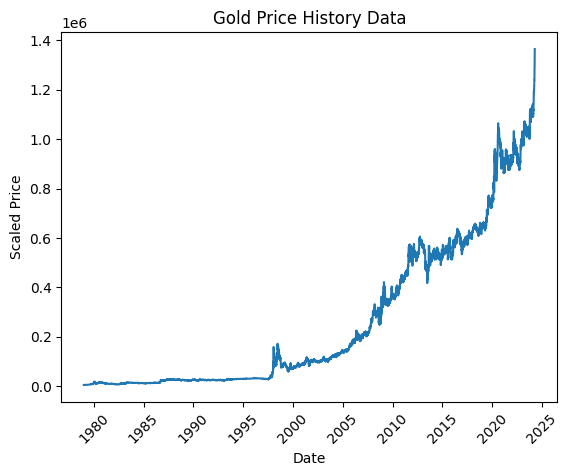

In [57]:
plt.plot(dt['Date'], dt['IDR'])
plt.xlabel("Date")
plt.ylabel("Scaled Price")
plt.title("Gold Price History Data")
plt.xticks(rotation=45)
plt.yticks(np.round(np.linspace(min(dt['IDR']), max(dt['IDR']), 5), minor=True))
plt.grid(True)
plt.show()

In [11]:
with Nominatim(user_agent="indonesia_geolocator") as geolocator:
   location = geolocator.geocode("Universitas Nahdlatul Ulama Sunan Giri")
   addr = location.address
   lat = location.latitude
   long = location.longitude
print(addr)

AttributeError: 'NoneType' object has no attribute 'address'

In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2846 entries, 0 to 2845
Data columns (total 1 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Universitas Muhammadiyah Magelang  2846 non-null   object
dtypes: object(1)
memory usage: 22.4+ KB
